# Задание 1

---

Напишите программу, которая будет решать систему линейных уравнений вида:

\begin{matrix} a_{11}x+a_{12}y=b_{1}&(1) \\ a_{21}x+a_{22}y=b_{2} &(2) \end{matrix}
​	
На вход программа должна принимать 2 строки.

Каждая строка содержит 3 действительных числа через пробел: коэффициенты a и b.

На выходе программа должна выдавать значения x и y в одну строку через пробел.
 

Примечание 1. Для разделения строки на отдельные элементы используйте функцию split()

Примечание 2. В качестве разделителя между целой и дробной частью используйте точку, например 0.2

In [1]:
import numpy as np
from numpy import linalg


def solve_system_of_linear_equations(
    first_equation: str,
    second_equation: str
) -> str:
    *args1, b1 = map(float, first_equation.split())
    *args2, b2 = map(float, second_equation.split())
    try:
        result = linalg.solve(
            np.array([args1, args2]),
            np.array([b1, b2])
        )
    except linalg.LinAlgError:
        result = ()

    return result


def formatted_system_of_linear_equations_solution(
    first_equation: str,
    second_equation: str
):
    return ' '.join(map(str, solve_system_of_linear_equations(first_equation, second_equation)))

In [2]:
formatted_system_of_linear_equations_solution('0 2 1', '2 3 4')

'1.25 0.5'

# Задание 2

Напишите функцию `decorate_matrix`, которая получает на вход одно целое число больше единицы. Функция должна возвращать матрицу n на n, у которой на границах стоят единицы, а на всех остальных позициях(если остались позиции не на границах) стоят нули.

Нужно сделать без использования  циклов.

```
# ожидаемый резальтат для аргумента 5
array([[1., 1., 1., 1., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 1., 1., 1., 1.]])
```



In [5]:
def decorate_matrix(
    n: int
) -> np.array:
    assert n > 1
    a = np.ones((n, n))
    a[1:-1, 1:-1] = 0
    return a

In [6]:
decorate_matrix(4)

array([[1., 1., 1., 1.],
       [1., 0., 0., 1.],
       [1., 0., 0., 1.],
       [1., 1., 1., 1.]])

# Задание 3

1) реализуйте 2 функции:

$f(x) = (x+a)^2 - b$ 
<br>
$g(x) = |f(x)|$

2) Найдите аргументы, при которых достигается минимум функций $f(x)$ и $g(x)$

Пример. 
Входные значение: $a=3$ и $b=4$

Выходные значения:

`-3.0 -1.0`

In [7]:
from scipy import optimize

a, b = ..., ...


def f(x):
    return (x + a) ** 2 - b


def g(x):
    return np.abs(f(x))


def minimize(func, _a, _b, **params):
    global a, b
    a, b = _a, _b
    return optimize.minimize_scalar(func, **params).x


def formatted_minimize(_a, _b):
    return ' '.join(map(str, (
        minimize(f, _a, _b),
        minimize(g, _a, _b),
    )))


In [8]:
formatted_minimize(1, 15)

'-0.99999997038 2.8729833708114114'

# Задание 4

Постройте графики для функций из предыдущего задания и отметьте другим цветом на графиках точки найденных минимумов.

In [9]:
import matplotlib.pyplot as plt

plt.style.use('dark_background')
plt.rcParams["figure.figsize"] = tuple(map(lambda x: 0.7 * x, plt.rcParamsDefault["figure.figsize"]))
plt.rcParams['lines.markersize'] = 0.7 * plt.rcParamsDefault["lines.markersize"]


def visualize_function(
    x_minimals,
    func,
):
    x = np.linspace(-20, 20, 200)
    plt.plot(x, func(x))
    plt.xlabel('x')
    plt.ylabel(f'{func.__name__}(x)')
    for x_min in x_minimals:
        plt.scatter(x_min, func(x_min), color='r')
    plt.show()


def visualize(
    _a: float,
    _b: float
):
    f_min = minimize(f, _a, _b)
    g_min = (
        minimize(g, _a, _b, bounds=(f_min, 100), method='bounded'),
        minimize(g, _a, _b, bounds=(-100, f_min), method='bounded')
    )
    visualize_function([f_min], f)
    visualize_function(g_min, g)


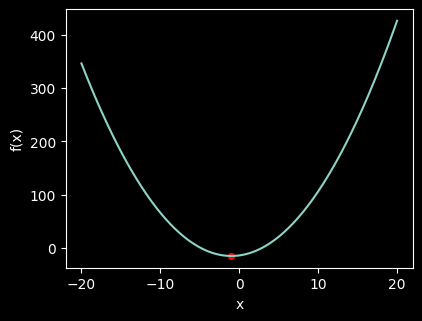

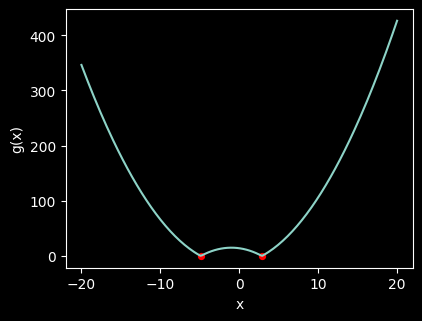

In [10]:
visualize(1, 15)

# Задание 5

1000 человек бросают монетку. Каждый бросил 10 раз подряд.

 1. Какова вероятность того, что хотя бы у одного человека монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)? 
 2. Какова вероятность того, что хотя бы у одного человека монетка выпала 8 раз подряд той же самой стороной (орлом или решкой)? 
 3. Какова вероятность того, что ровно у троих человек из 1000 монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)?

In [11]:
from random import randrange

humans_count = 1000
throws_count = 10


def at_least_one_ten_equal():
    for _ in range(humans_count):
        sample = [randrange(2) for _ in range(throws_count)]
        if sum(sample) in [10, 0]:
            return 1

    return 0


def at_least_one_eight_equal():
    for _ in range(humans_count):
        sample = [randrange(2) for _ in range(throws_count)]
        for l in range(throws_count - 8):
            if sum(sample[l: throws_count + l]) in [0, 8]:
                return 1

    return 0


def only_three_ten_equal():
    count = 0
    for _ in range(humans_count):
        sample = [randrange(2) for _ in range(throws_count)]
        count += sum(sample) in [10, 0]

    return count == 3


def testing(func, number_of_experiments = 5000):
    return sum([func() for _ in range(number_of_experiments)]) / number_of_experiments

print(testing(at_least_one_ten_equal))
print(testing(at_least_one_eight_equal))
print(testing(only_three_ten_equal))

0.861
1.0
0.1814
